## Shipping Consignment Price Prediction
Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Cleaning
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem Statement

The market for logistics analytics is expected to develop at a CAGR of 17.3 percent from 2019 to 2024, more than doubling in size. This data demonstrates how logistics organizations are understanding the advantages of being able to predict what will happen in the future with a decent degree of certainty. Logistics leaders may use this data to address supply chain difficulties, cut costs, and enhance service levels all at the same time.

The main goal is to predict the consignment pricing based on the available factors in the dataset.

### 2) Data Collection.
- The Dataset is collected from https://www.kaggle.com/datasets/divyeshardeshana/supply-chain-shipment-pricing-data
- The data consists of 33 columns and 10324 rows.

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

Import the CSV Data as Pandas DataFrame

In [45]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

Show Top 5 Records

In [46]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [47]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

Shape of the dataset

In [48]:
df.shape

(10324, 33)

Replacing spaces in column names by _

In [49]:
def replace_space_with_underscore(df):
    new_columns = [col.replace(' ', '_') for col in df.columns]
    df_renamed = df.rename(columns=dict(zip(df.columns, new_columns)))
    return df_renamed

In [50]:
df = replace_space_with_underscore(df)

In [51]:
df.columns

Index(['ID', 'Project_Code', 'PQ_#', 'PO_/_SO_#', 'ASN/DN_#', 'Country',
       'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode',
       'PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Product_Group', 'Sub_Classification',
       'Vendor', 'Item_Description', 'Molecule/Test_Type', 'Brand', 'Dosage',
       'Dosage_Form', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

Check Datatypes in the dataset

In [52]:
# check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project_Code                  10324 non-null  object 
 2   PQ_#                          10324 non-null  object 
 3   PO_/_SO_#                     10324 non-null  object 
 4   ASN/DN_#                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed_By                    10324 non-null  object 
 7   Fulfill_Via                   10324 non-null  object 
 8   Vendor_INCO_Term              10324 non-null  object 
 9   Shipment_Mode                 9964 non-null   object 
 10  PQ_First_Sent_to_Client_Date  10324 non-null  object 
 11  PO_Sent_to_Vendor_Date        10324 non-null  object 
 12  Scheduled_Delivery_Date       10324 non-null  object 
 13  D

In [53]:
df.dtypes

ID                                int64
Project_Code                     object
PQ_#                             object
PO_/_SO_#                        object
ASN/DN_#                         object
Country                          object
Managed_By                       object
Fulfill_Via                      object
Vendor_INCO_Term                 object
Shipment_Mode                    object
PQ_First_Sent_to_Client_Date     object
PO_Sent_to_Vendor_Date           object
Scheduled_Delivery_Date          object
Delivered_to_Client_Date         object
Delivery_Recorded_Date           object
Product_Group                    object
Sub_Classification               object
Vendor                           object
Item_Description                 object
Molecule/Test_Type               object
Brand                            object
Dosage                           object
Dosage_Form                      object
Unit_of_Measure_(Per_Pack)        int64
Line_Item_Quantity                int64


Summary of the dataset

In [54]:
# Display summary statistics for a dataframe
df.describe()

,ID,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,Line_Item_Insurance_(USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [55]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10324.0,NaN,NaN,NaN,51098.968229,31944.332496,1.0,12795.75,57540.5,83648.25,86823.0
Project_Code,10324,142,116-ZA-T30,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PQ_#,10324,1237,Pre-PQ Process,2681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PO_/_SO_#,10324,6233,SCMS-199289,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASN/DN_#,10324,7030,ASN-19166,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,10324,43,South Africa,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Managed_By,10324,4,PMO - US,10265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfill_Via,10324,2,From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor_INCO_Term,10324,8,N/A - From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shipment_Mode,9964,4,Air,6113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since project code representing same value from combination of Country code we can drop it

In [56]:
df.columns

Index(['ID', 'Project_Code', 'PQ_#', 'PO_/_SO_#', 'ASN/DN_#', 'Country',
       'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode',
       'PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Product_Group', 'Sub_Classification',
       'Vendor', 'Item_Description', 'Molecule/Test_Type', 'Brand', 'Dosage',
       'Dosage_Form', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

In [57]:
df.drop(columns='Project_Code', axis=1, inplace=True)

In [58]:
df.head()

,ID,PQ_#,PO_/_SO_#,ASN/DN_#,Country,Managed_By,Fulfill_Via,Vendor_INCO_Term,Shipment_Mode,PQ_First_Sent_to_Client_Date,PO_Sent_to_Vendor_Date,Scheduled_Delivery_Date,Delivered_to_Client_Date,Delivery_Recorded_Date,Product_Group,Sub_Classification,Vendor,Item_Description,Molecule/Test_Type,Brand,Dosage,Dosage_Form,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,Manufacturing_Site,First_Line_Designation,Weight_(Kilograms),Freight_Cost_(USD),Line_Item_Insurance_(USD)
0,1,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


PQ_# representing same information from PQ_First_Sent_to_Client_Date it is repeatative so we can drop it

In [59]:
df.columns

Index(['ID', 'PQ_#', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Managed_By',
       'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode',
       'PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Product_Group', 'Sub_Classification',
       'Vendor', 'Item_Description', 'Molecule/Test_Type', 'Brand', 'Dosage',
       'Dosage_Form', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

In [60]:
df.drop(columns='PQ_#', axis=1, inplace=True)

In [61]:
df.head()

,ID,PO_/_SO_#,ASN/DN_#,Country,Managed_By,Fulfill_Via,Vendor_INCO_Term,Shipment_Mode,PQ_First_Sent_to_Client_Date,PO_Sent_to_Vendor_Date,Scheduled_Delivery_Date,Delivered_to_Client_Date,Delivery_Recorded_Date,Product_Group,Sub_Classification,Vendor,Item_Description,Molecule/Test_Type,Brand,Dosage,Dosage_Form,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,Manufacturing_Site,First_Line_Designation,Weight_(Kilograms),Freight_Cost_(USD),Line_Item_Insurance_(USD)
0,1,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [62]:
df.Shipment_Mode.unique()

array(['Air', nan, 'Truck', 'Air Charter', 'Ocean'], dtype=object)

In [63]:
df.Shipment_Mode.value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment_Mode, dtype: int64

In [64]:
df.shape

(10324, 31)

#### 3. Exploring Data

In [65]:
# define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

# print columns
print("We have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("\nWe have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 7 numerical features : ['ID', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Line_Item_Insurance_(USD)']

We have 24 categorical features : ['PO_/_SO_#', 'ASN/DN_#', 'Country', 'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date', 'Delivered_to_Client_Date', 'Delivery_Recorded_Date', 'Product_Group', 'Sub_Classification', 'Vendor', 'Item_Description', 'Molecule/Test_Type', 'Brand', 'Dosage', 'Dosage_Form', 'Manufacturing_Site', 'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)']


Checking Any Duplicate Records present or not inside Dataframe

In [66]:
df.duplicated().sum()

0

Checking the null in the dataset.

In [67]:
df.isnull().sum().sort_values(ascending=False)

Dosage                          1736
Shipment_Mode                    360
Line_Item_Insurance_(USD)        287
Item_Description                   0
Freight_Cost_(USD)                 0
Weight_(Kilograms)                 0
First_Line_Designation             0
Manufacturing_Site                 0
Unit_Price                         0
Pack_Price                         0
Line_Item_Value                    0
Line_Item_Quantity                 0
Unit_of_Measure_(Per_Pack)         0
Dosage_Form                        0
Brand                              0
Molecule/Test_Type                 0
ID                                 0
PO_/_SO_#                          0
Sub_Classification                 0
Product_Group                      0
Delivery_Recorded_Date             0
Delivered_to_Client_Date           0
Scheduled_Delivery_Date            0
PO_Sent_to_Vendor_Date             0
PQ_First_Sent_to_Client_Date       0
Vendor_INCO_Term                   0
Fulfill_Via                        0
M

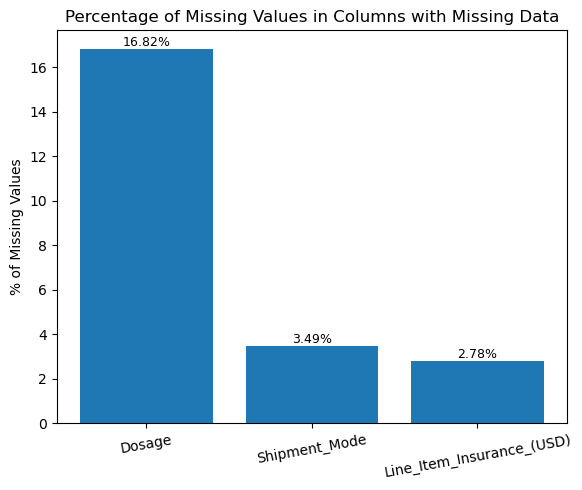

In [68]:
missing_value_count = df.isnull().sum().sort_values(ascending=False)
columns_with_missing_values = missing_value_count[missing_value_count > 0]
total_rows = len(df)
percentage_missing_values = (columns_with_missing_values / total_rows) * 100
plt.figure(figsize=(6,5))
bars = plt.bar(percentage_missing_values.index, percentage_missing_values.values)
plt.xticks(rotation=10)
plt.ylabel('% of Missing Values')
plt.title('Percentage of Missing Values in Columns with Missing Data')

# Add percentage information to the labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

In [69]:
percentage_missing_values.index

Index(['Dosage', 'Shipment_Mode', 'Line_Item_Insurance_(USD)'], dtype='object')

In [70]:
percentage_missing_values

Dosage                       16.815188
Shipment_Mode                 3.487021
Line_Item_Insurance_(USD)     2.779930
dtype: float64

In [71]:
#since it contain all unique value it is not necessary for our analusis we can drop it 
df.drop(columns=['ID'],axis=1,inplace=True)

### Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### Numerical Features

KeyError: 'ID'

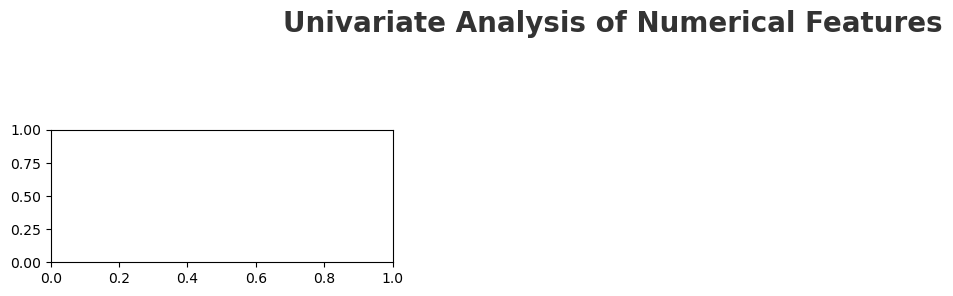

In [72]:
plt.figure(figsize=(15, 10))
plt.suptitle(
    "Univariate Analysis of Numerical Features",
    fontsize=20,
    fontweight="bold",
    alpha=0.8,
    y=1.0,
)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df[numerical_features[i]], color="blue")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_Num.png')

#### Categorical Features

In [73]:
df.columns

Index(['PO_/_SO_#', 'ASN/DN_#', 'Country', 'Managed_By', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date',
       'Delivered_to_Client_Date', 'Delivery_Recorded_Date', 'Product_Group',
       'Sub_Classification', 'Vendor', 'Item_Description',
       'Molecule/Test_Type', 'Brand', 'Dosage', 'Dosage_Form',
       'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

Country wise Analysis with Graph

In [76]:
# Top 10 countries
df['Country'].value_counts().sort_values(ascending=False).head(10)

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: Country, dtype: int64

         Country  Count
0   South Africa   1406
1        Nigeria   1194
2  Côte d'Ivoire   1083
3         Uganda    779
4        Vietnam    688
5         Zambia    683
6          Haiti    655
7     Mozambique    631
8       Zimbabwe    538
9       Tanzania    519


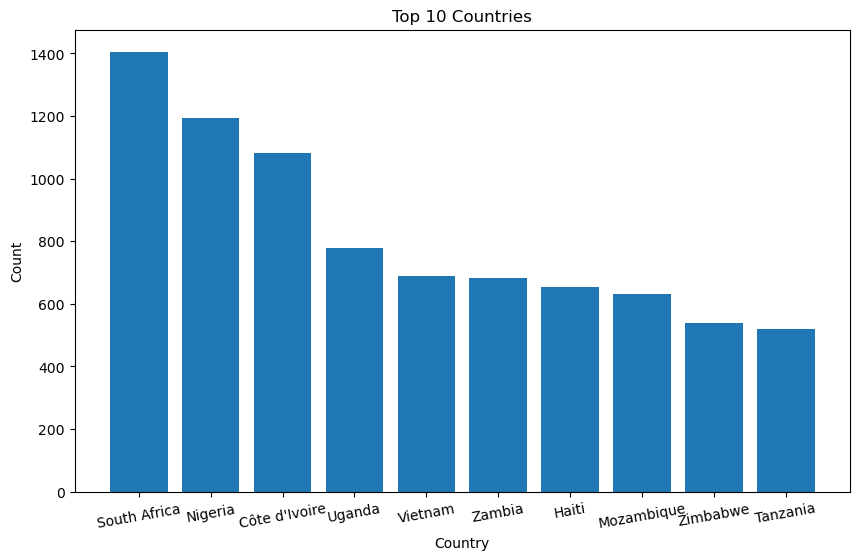

In [100]:
# Top 10 country
top_10_countries = df['Country'].value_counts().sort_values(ascending=False).head(10)
# Create a new DataFrame with the counts and country names
df_top_10 = pd.DataFrame({'Country': top_10_countries.index, 'Count': top_10_countries.values})
# Plot the bar chart using Plotly Express
print(df_top_10)
plt.figure(figsize=(10,6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')
plt.xticks(rotation=10)
plt.show()
